# Homework 4: Graph Spectra

## Data Mining (ID2222)


### Authors: Philip Claesson (Philipcl@kth.se), Miguel Maricalva (miguelma@kth.se)

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy
import os

In [2]:
def readData(data_path):
    # Read data (graph edges)
    with open(data_path) as f:
        edges = [tuple([int(x) for x in line.strip().split(',')]) for line in f]

    # Extract nodes
    nodes = np.unique(np.asarray(edges))
    num_nodes = nodes.shape[0]

    return edges, nodes


In [3]:
def plotData(edges, nodes):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20))
    plt.show()
    return edges, nodes

In [14]:
def keigen(edges, nodes):
    num_nodes = nodes.shape[0]
    #affinity matrix
    A = np.zeros([num_nodes, num_nodes])
    for tup in edges:
        A[tup[0]-1, tup[1]-1] = 1

    #diagonal matrix
    D = np.diag(np.sum(A, axis=1))

    #normalized laplacian
    D_ = np.linalg.inv(np.sqrt(D))
    L = np.dot(np.dot(D_, A), D_)
    
    #eigenvalues and eigenvectors
    w, v = scipy.linalg.eigh(L)
    
    #optimal k
    k = np.argmin(np.ediff1d(np.flipud(w))) + 1
    
    #eigenvectors matrix
    X = v[:, num_nodes - k:]

    #renormalized
    Y = np.divide(X, np.reshape(np.linalg.norm(X, axis=1), (X.shape[0], 1)))

    #kmeans clusterization
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Y)

    #reassign original nodes
    cluster_labels = kmeans.labels_
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    nx.draw(G, node_size=20, pos=nx.spring_layout(G, k=0.05, iterations=20), node_color=cluster_labels)


## Dataset 1

/Users/philipclaesson/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


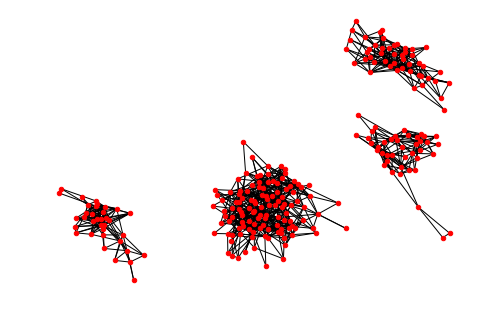

([(1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (8, 9),
  (8, 10),
  (8, 5),
  (8, 11),
  (8, 12),
  (13, 14),
  (13, 15),
  (13, 16),
  (13, 17),
  (13, 18),
  (13, 19),
  (20, 21),
  (20, 22),
  (20, 23),
  (20, 24),
  (20, 25),
  (26, 27),
  (26, 28),
  (26, 29),
  (26, 30),
  (26, 31),
  (26, 32),
  (26, 33),
  (34, 15),
  (34, 16),
  (34, 35),
  (34, 23),
  (21, 36),
  (21, 37),
  (21, 38),
  (21, 23),
  (21, 25),
  (2, 39),
  (2, 40),
  (2, 10),
  (2, 41),
  (2, 11),
  (2, 42),
  (43, 13),
  (43, 44),
  (43, 45),
  (43, 36),
  (43, 15),
  (43, 46),
  (43, 47),
  (43, 11),
  (48, 26),
  (48, 29),
  (48, 31),
  (48, 49),
  (48, 50),
  (48, 51),
  (48, 52),
  (9, 40),
  (9, 53),
  (9, 10),
  (9, 3),
  (27, 26),
  (27, 16),
  (27, 54),
  (27, 46),
  (27, 55),
  (27, 25),
  (56, 14),
  (56, 18),
  (56, 57),
  (56, 58),
  (59, 13),
  (59, 15),
  (59, 60),
  (59, 4),
  (59, 61),
  (62, 26),
  (62, 15),
  (62, 63),
  (62, 64),
  (65, 13),
  (65, 15),
  (65, 18),
  (65, 11),

In [15]:
edges, nodes = readData('example1.dat')
plotData(edges, nodes)

/Users/philipclaesson/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


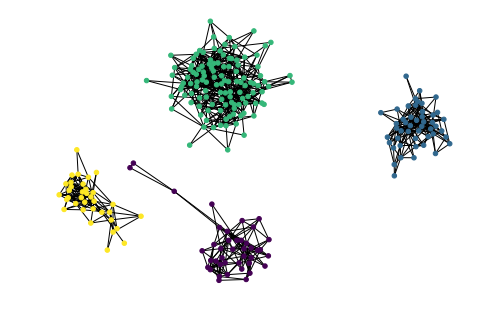

In [16]:
keigen(edges, nodes)

## Dataset 2

/Users/philipclaesson/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


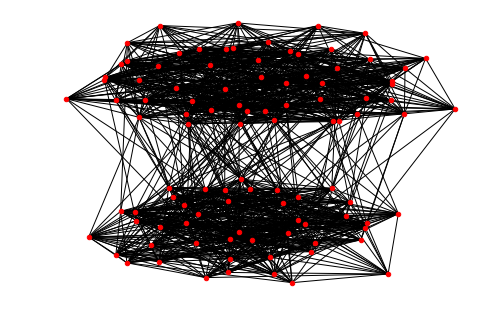

([(2, 1),
  (9, 1),
  (12, 1),
  (18, 1),
  (20, 1),
  (21, 1),
  (24, 1),
  (26, 1),
  (31, 1),
  (36, 1),
  (39, 1),
  (43, 1),
  (44, 1),
  (50, 1),
  (57, 1),
  (61, 1),
  (63, 1),
  (66, 1),
  (75, 1),
  (82, 1),
  (84, 1),
  (93, 1),
  (94, 1),
  (1, 2),
  (4, 2),
  (5, 2),
  (8, 2),
  (13, 2),
  (23, 2),
  (24, 2),
  (31, 2),
  (36, 2),
  (37, 2),
  (65, 2),
  (66, 2),
  (71, 2),
  (82, 2),
  (84, 2),
  (85, 2),
  (88, 2),
  (4, 3),
  (6, 3),
  (7, 3),
  (11, 3),
  (14, 3),
  (16, 3),
  (27, 3),
  (32, 3),
  (33, 3),
  (34, 3),
  (35, 3),
  (36, 3),
  (38, 3),
  (46, 3),
  (54, 3),
  (58, 3),
  (60, 3),
  (68, 3),
  (81, 3),
  (89, 3),
  (91, 3),
  (92, 3),
  (97, 3),
  (98, 3),
  (99, 3),
  (100, 3),
  (2, 4),
  (3, 4),
  (12, 4),
  (15, 4),
  (18, 4),
  (23, 4),
  (25, 4),
  (26, 4),
  (27, 4),
  (57, 4),
  (65, 4),
  (66, 4),
  (71, 4),
  (73, 4),
  (75, 4),
  (79, 4),
  (85, 4),
  (88, 4),
  (93, 4),
  (95, 4),
  (97, 4),
  (2, 5),
  (15, 5),
  (19, 5),
  (21, 5),
  (29, 5),

In [17]:
data_path = 'example2.dat'
with open(data_path) as f:
    edges2 = [tuple([int(x) for x in line.strip().split(',')]) for line in f]
edges2 = [tuple([edge[0], edge[1]]) for edge in edges2]

nodes2 = np.unique(np.asarray(edges2))
num_nodes2 = nodes2.shape[0]

plotData(edges2, nodes2)

/Users/philipclaesson/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


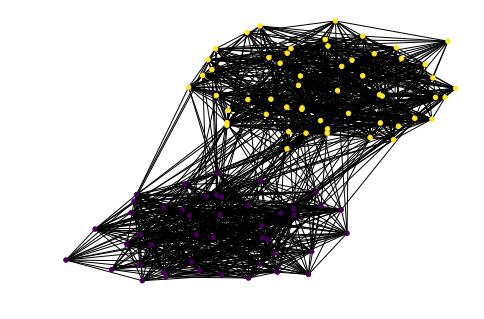

In [18]:
keigen(edges2, nodes2)